# Analysis of MD tags (NIR analyser)

In [2]:
import pandas as pd 
import numpy as np 
import scipy.io 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")

### Read data
* Data are collected from IP21 as of 1/1/2014 on an hourly basis

In [3]:
fn1 = "P:\Collaboration_intern\Benzene\Database\Benzene_V6.csv"
df = pd.read_csv(fn1)
df.shape

(25397, 730)

### Data Processing
* Select only the MD tags
* 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(25397, 12)


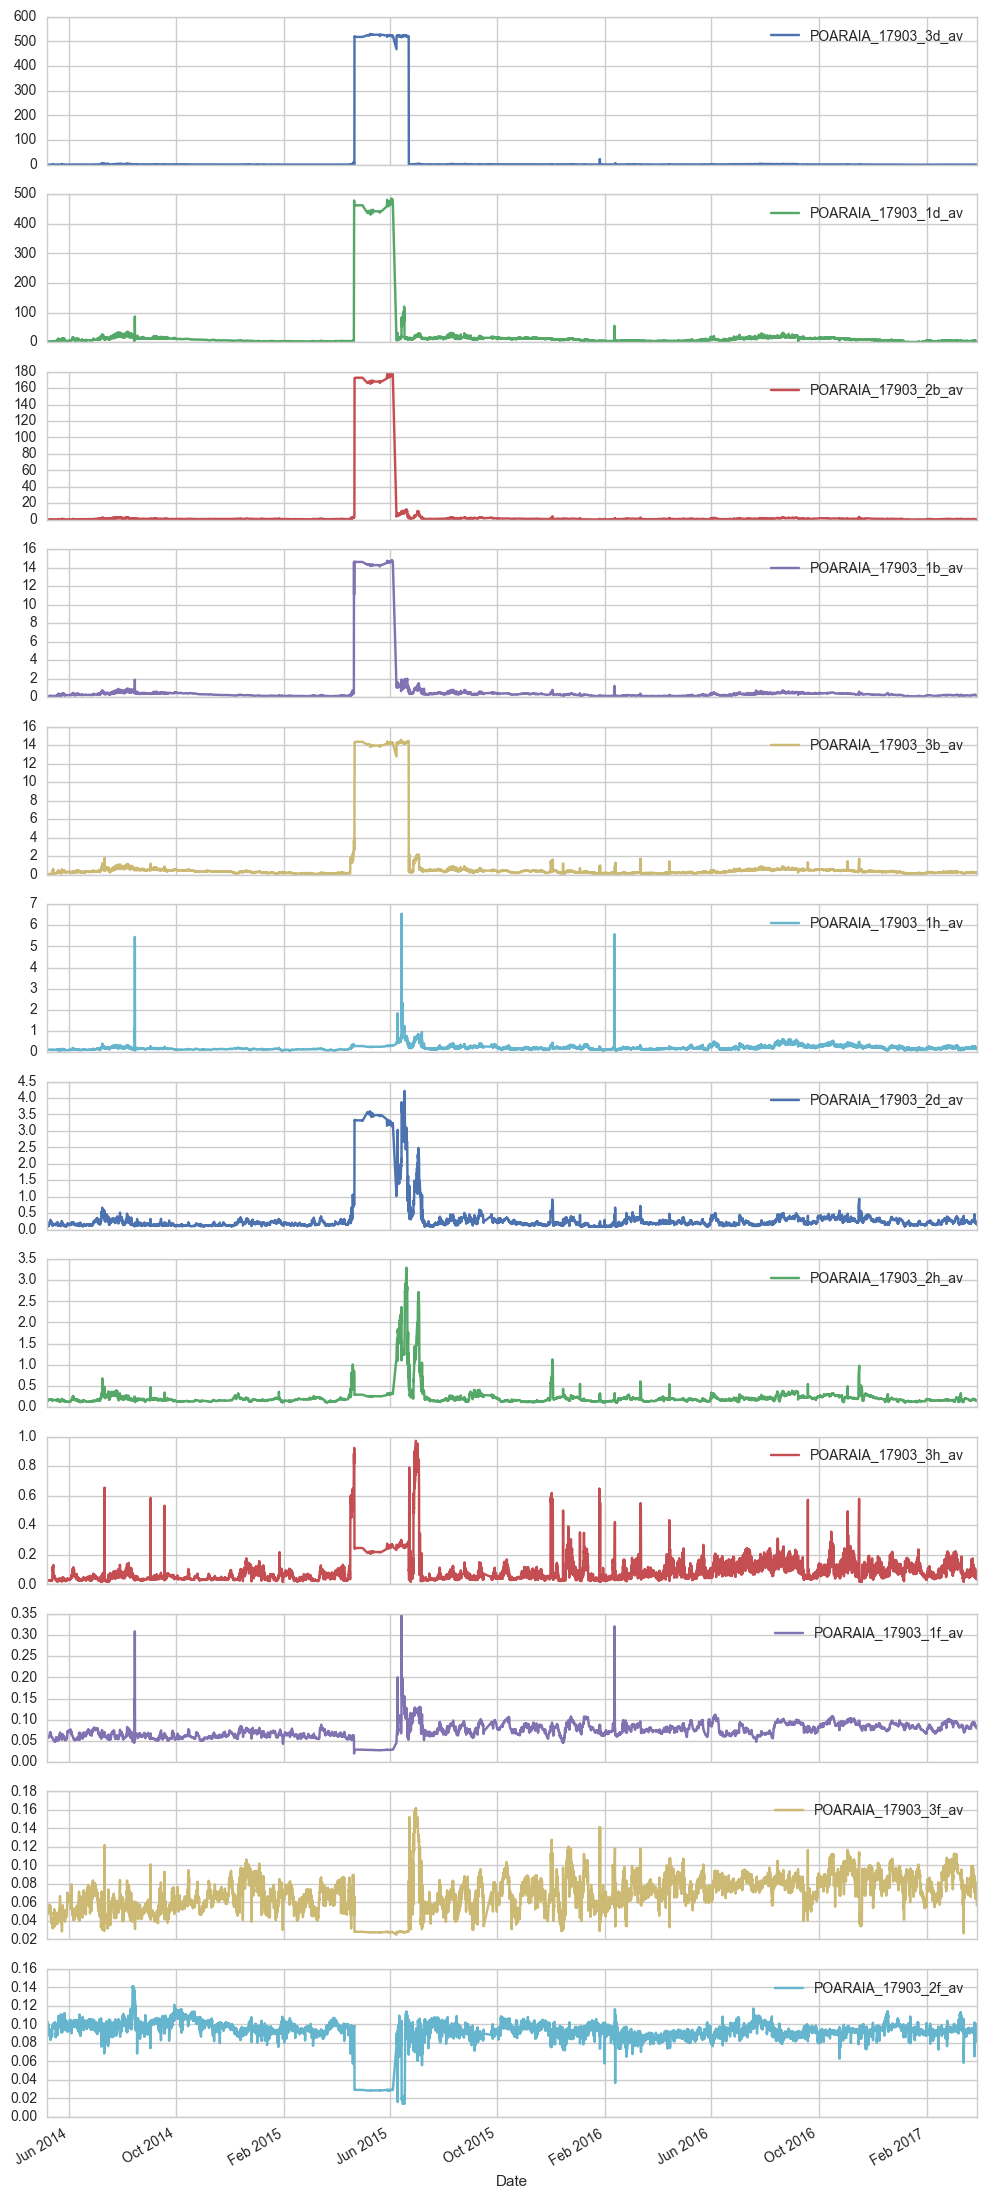

(24764, 12)


In [5]:
colnames = df.columns
colnames
cols = ['Date','POARAIA_17903_3d_av','POARAIA_17903_1d_av','POARAIA_17903_2b_av','POARAIA_17903_1b_av','POARAIA_17903_3b_av','POARAIA_17903_1h_av','POARAIA_17903_2d_av','POARAIA_17903_2h_av','POARAIA_17903_3h_av','POARAIA_17903_1f_av','POARAIA_17903_3f_av','POARAIA_17903_2f_av']
#df[cols].describe()
df_tempcol = df[cols]
df_tempcol['Date'] = pd.to_datetime(df_tempcol['Date'])
df_tempcol.set_index('Date',inplace=True)
print(df_tempcol.shape)
df_tempcol.dropna(inplace=True)
df_tempcol.plot(subplots=True,figsize=(12,30))
plt.show()
df_tempcol.replace(0.0,np.nan).dropna(inplace=True)
print(df_tempcol.shape)
df_tempcol = df_tempcol[df_tempcol['POARAIA_17903_3d_av']<100]
#df_tempcol = df_tempcol[df_tempcol['POARTI_17910_av']<140]
#df_tempcol = df_tempcol[df_tempcol['RecRate']>0.1]

Descriptive statistics of the temperature tags and recovery rate

In [6]:
df_tempcol.describe()

,POARAIA_17903_3d_av,POARAIA_17903_1d_av,POARAIA_17903_2b_av,POARAIA_17903_1b_av,POARAIA_17903_3b_av,POARAIA_17903_1h_av,POARAIA_17903_2d_av,POARAIA_17903_2h_av,POARAIA_17903_3h_av,POARAIA_17903_1f_av,POARAIA_17903_3f_av,POARAIA_17903_2f_av
count,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000,23676.000000
mean,1.283618,9.349603,1.041603,0.297463,0.357157,0.195446,0.228654,0.201759,0.084261,0.074793,0.071227,0.094481
std,0.808344,12.013583,0.676179,0.354336,0.253081,0.137447,0.160910,0.151886,0.087519,0.014695,0.017330,0.007169
min,0.061809,0.248856,0.055880,0.032321,0.044326,0.049418,0.075280,0.100045,0.016045,0.020002,0.026564,0.036662
25%,0.829001,4.103015,0.690689,0.160978,0.191989,0.132304,0.145103,0.146280,0.040491,0.063525,0.058160,0.090228
50%,1.150925,7.911740,0.938473,0.263693,0.311219,0.163738,0.191348,0.173295,0.062109,0.073239,0.071182,0.094134
75%,1.554645,12.757400,1.217725,0.388461,0.462707,0.231152,0.274036,0.212351,0.101499,0.084988,0.082784,0.098703
max,55.073100,479.161000,10.682800,14.617800,3.924100,5.577690,2.479110,2.720260,0.971116,0.320788,0.161977,0.141427


### Analysis of Distribution


#### Distribution of POARAIA_17903_3d_av


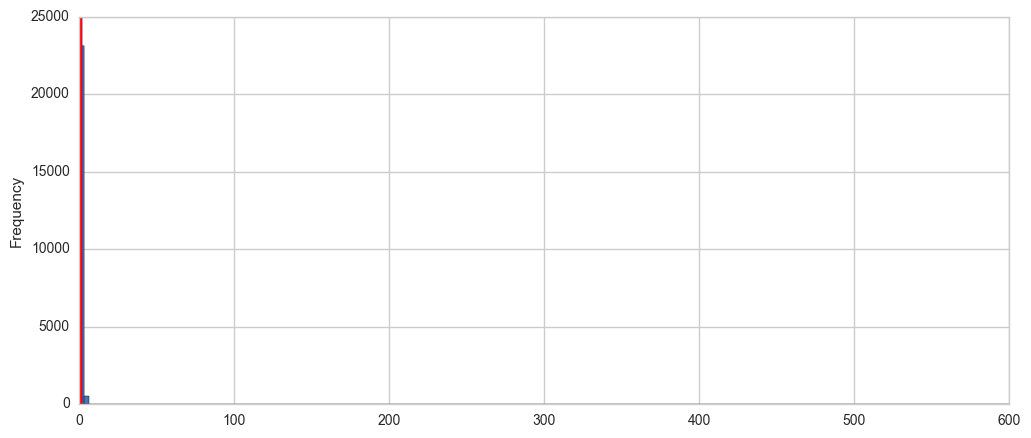

In [7]:
binBoundaries = np.linspace(0.0,600.0,200)
df_tempcol['POARAIA_17903_3d_av'].plot(kind='hist', bins=binBoundaries, figsize=(12,5))
plt.axvline(x=1)
plt.axvline(x=df_tempcol['POARAIA_17903_3d_av'].mean(),color='r')
plt.show()

#### Distribution of MD tags (range 0 to 10)

12 ['POARAIA_17903_3d_av', 'POARAIA_17903_1d_av', 'POARAIA_17903_2b_av', 'POARAIA_17903_1b_av', 'POARAIA_17903_3b_av', 'POARAIA_17903_1h_av', 'POARAIA_17903_2d_av', 'POARAIA_17903_2h_av', 'POARAIA_17903_3h_av', 'POARAIA_17903_1f_av', 'POARAIA_17903_3f_av', 'POARAIA_17903_2f_av']


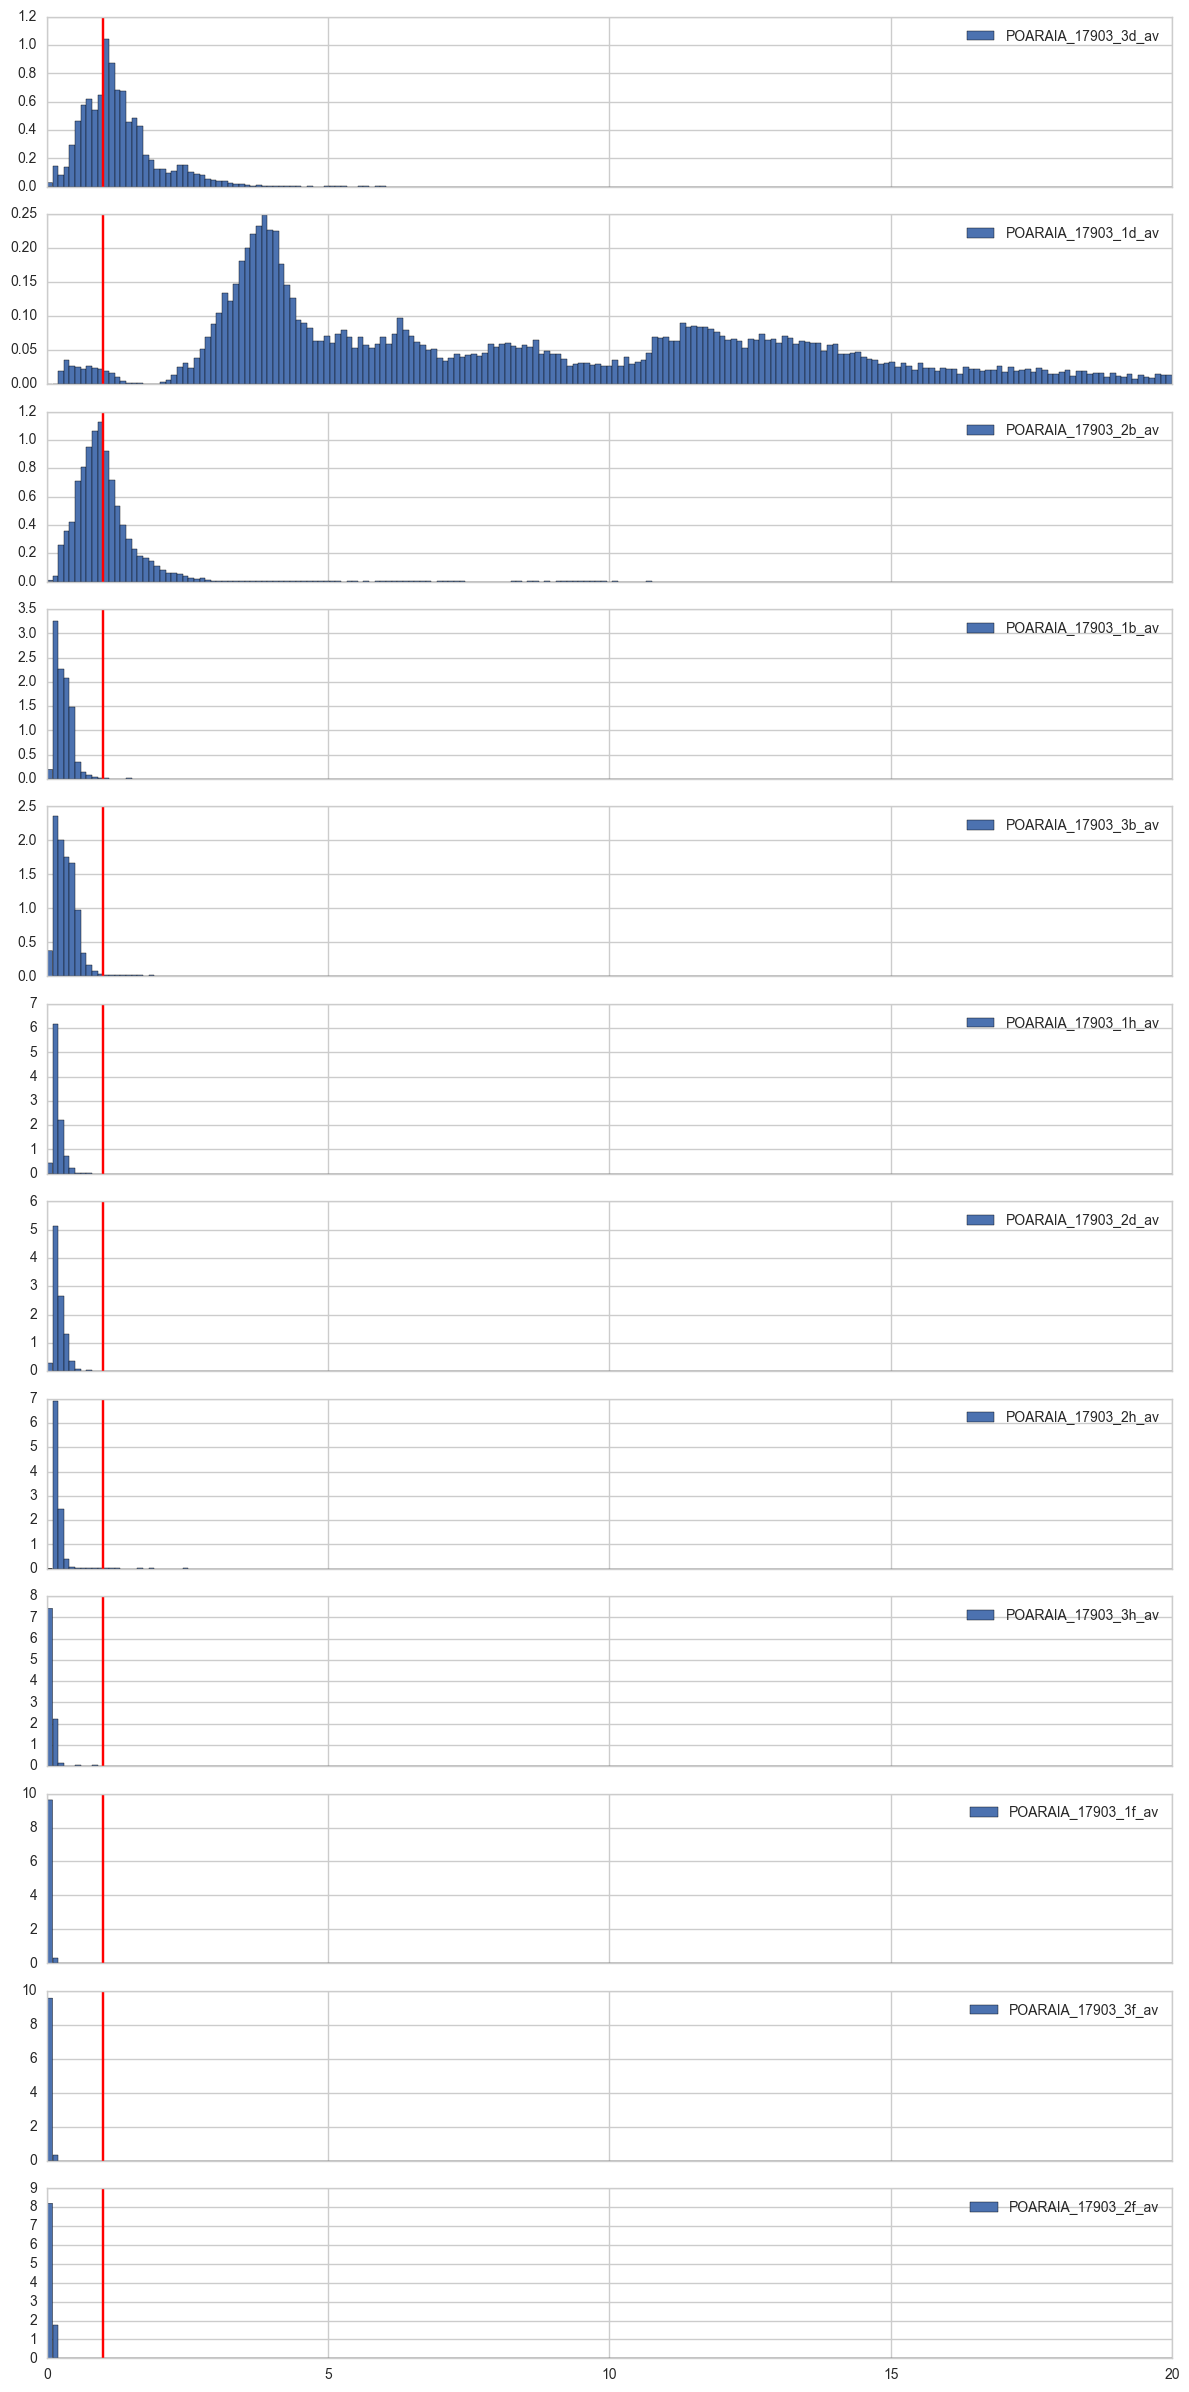

In [9]:
import matplotlib as mpl
def plothistograms(df):
    clusters = df.columns.values.tolist()
    numclus = len(clusters)
    numSubPlots = numclus
    #clusters1 = [s[::-1] for s in clusters]
    #clusters1.sort()
    #clusters2 = [s[::-1] for s in clusters1]
    
    print(numSubPlots,clusters)
    #cmap=mpl.cm.Dark2.colors
    cmap=['r','g','b','y']
    cmapgen=['r','g','b','y','c','m','Olive','Brown']
    #cmap = [cmapgen[i] for i in clusters]
    f, axarr = plt.subplots(nrows=numSubPlots, ncols=1, figsize=(12,numSubPlots*2),sharex=True)
    for i, cluster in enumerate(clusters):
        binBoundaries = np.linspace(0.0,20.0,200)
        axarr[i].hist(df[cluster],bins=binBoundaries,normed=True,orientation='vertical',label=cluster)
        #m = df[cluster].mean()
        axarr[i].axvline(x=1,color='r')
        axarr[i].legend(loc='upper right',ncol=1)
    plt.tight_layout()
    
plothistograms(df_tempcol)